In [1]:
import pandas as pd
import numpy as np
import copy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("tempo-recife.csv", sep=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Medicao                             1766 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)           1756 non-null   float64
 2   TEMPERATURA MAXIMA, DIARIA(°C)           1693 non-null   float64
 3   TEMPERATURA MINIMA, DIARIA(°C)           1756 non-null   float64
 4   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)  1686 non-null   float64
 5   VENTO, VELOCIDADE MEDIA DIARIA(m/s)      1761 non-null   float64
 6   Unnamed: 6                               0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 96.7+ KB


In [5]:
df = df.drop("Unnamed: 6", axis=1)
df = df.dropna()

## Visualização de Series Temporais

Visualização por index temporal

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:>

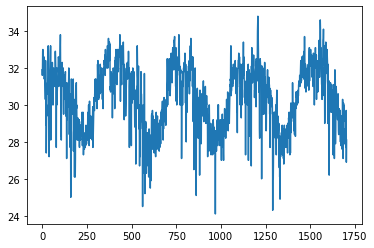

In [7]:
df["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

In [8]:
df.index = pd.to_datetime(df["Data Medicao"])

In [9]:
df.dtypes

Data Medicao                                object
PRECIPITACAO TOTAL, DIARIO(mm)             float64
TEMPERATURA MAXIMA, DIARIA(°C)             float64
TEMPERATURA MINIMA, DIARIA(°C)             float64
UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)    float64
VENTO, VELOCIDADE MEDIA DIARIA(m/s)        float64
dtype: object

<AxesSubplot:xlabel='Data Medicao'>

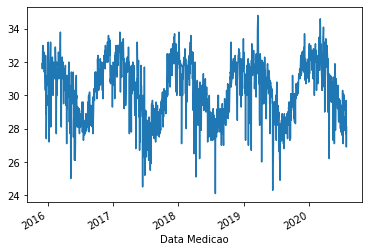

In [10]:
df["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

Recortes temporais

<AxesSubplot:xlabel='Data Medicao'>

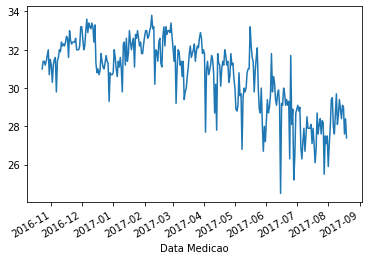

In [11]:
df[324:624]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

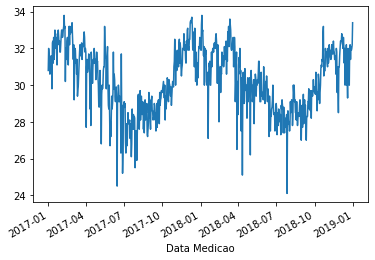

In [12]:
df["2017":"2018"]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

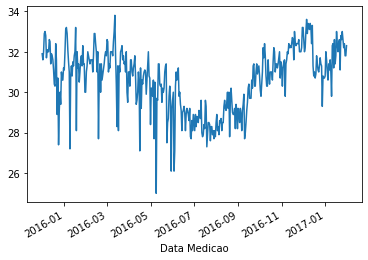

In [13]:
df[:"2017-01"]["TEMPERATURA MAXIMA, DIARIA(°C)"].plot()

Ajustes de tamanho de gráfico

In [14]:
matplotlib.rcParams['figure.figsize'] = [16, 6]

<AxesSubplot:xlabel='Data Medicao'>

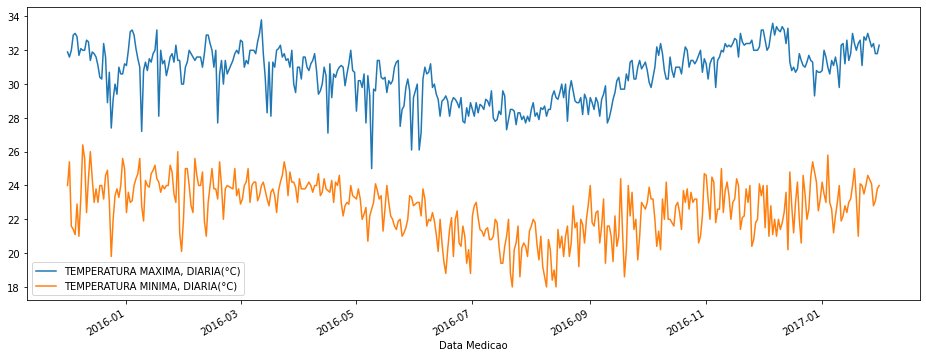

In [15]:
df[:"2017-01"][["TEMPERATURA MAXIMA, DIARIA(°C)", "TEMPERATURA MINIMA, DIARIA(°C)"]].plot()

df com dados mensais a partir de 1961

In [16]:
df_hist=pd.read_csv("tempo-historico-recife.csv", sep=";")
df_hist=df_hist.drop("Unnamed: 6", axis=1)
df_hist=df_hist.dropna()
df_hist.index = pd.to_datetime(df_hist["Data Medicao"])

In [17]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639 entries, 1961-07-31 to 2020-07-31
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Data Medicao                             639 non-null    object 
 1   PRECIPITACAO TOTAL, MENSAL(mm)           639 non-null    float64
 2   TEMPERATURA MAXIMA MEDIA, MENSAL(°C)     639 non-null    float64
 3   TEMPERATURA MINIMA MEDIA, MENSAL(°C)     639 non-null    float64
 4   UMIDADE RELATIVA DO AR, MEDIA MENSAL(%)  639 non-null    float64
 5   VENTO, VELOCIDADE MEDIA MENSAL(m/s)      639 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.9+ KB


<AxesSubplot:xlabel='Data Medicao'>

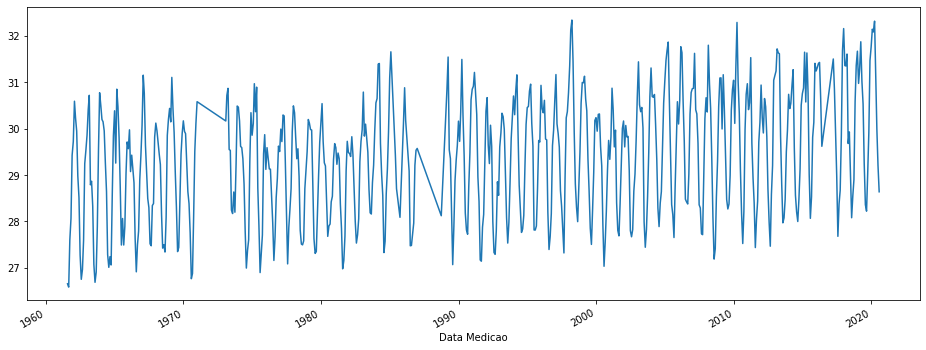

In [18]:
df_hist["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

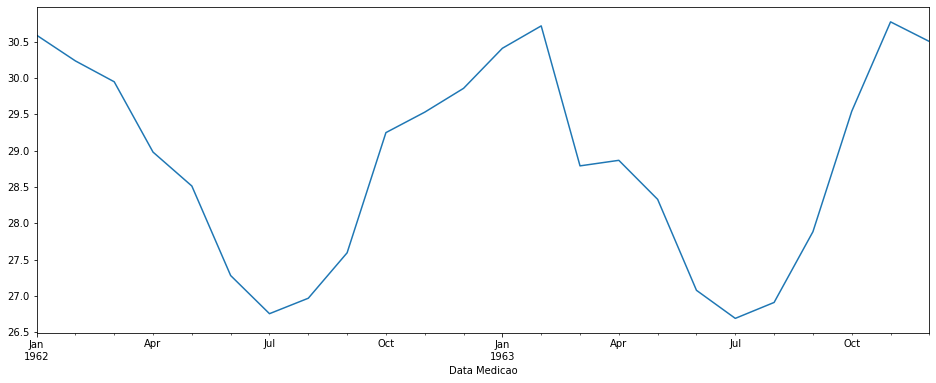

In [19]:
df_hist["1962":"1963"]["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

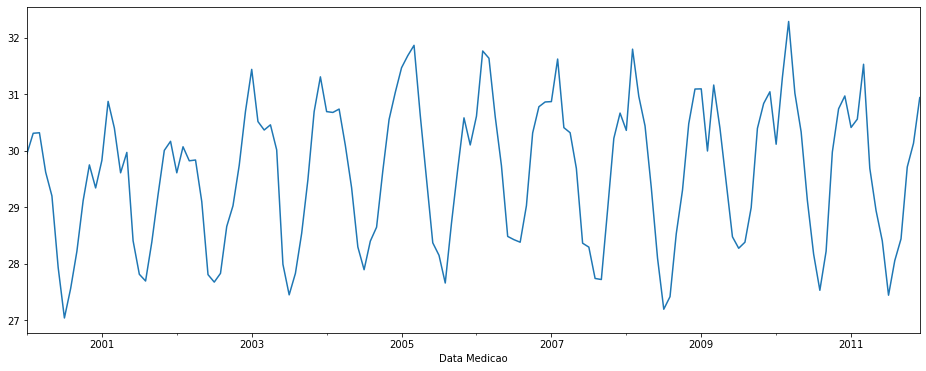

In [20]:
df_hist["2000":"2011"]["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()

## Aplicação de modelos para detalhamento de serie temporal

Separação de componentes temporais

In [21]:
import statsmodels.api as sm
import statsmodels

In [22]:
train = df_hist["1990":"2018"]
df=df[:"2020-07"]

ARIMA model

/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                         
Dep. Variable:     TEMPERATURA MAXIMA MEDIA, MENSAL(°C)   No. Observations:                  338
Model:                                            ARIMA   Log Likelihood                -558.002
Date:                                  Fri, 23 Dec 2022   AIC                           1120.004
Time:                                          09:39:56   BIC                           1127.650
Sample:                                               0   HQIC                          1123.051
                                                  - 338                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6477      0.069    427.773      0.000      29.512

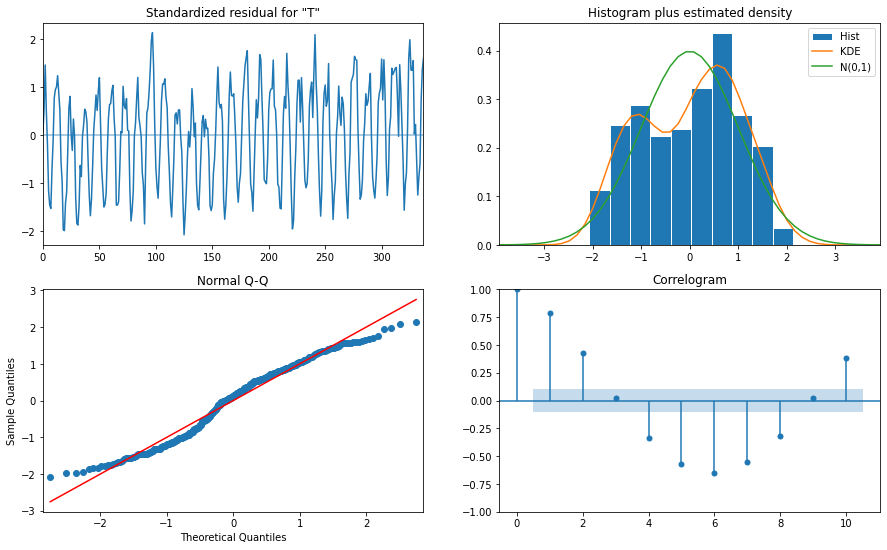

In [23]:
mod = sm.tsa.arima.ARIMA(train["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"])
res = mod.fit()
print(res.summary())
fig = res.plot_diagnostics(figsize=(15,9))

/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:     TEMPERATURA MAXIMA, DIARIA(°C)   No. Observations:                 1679
Model:                                      ARIMA   Log Likelihood               -3266.781
Date:                            Fri, 23 Dec 2022   AIC                           6537.563
Time:                                    09:39:57   BIC                           6548.414
Sample:                                         0   HQIC                          6541.582
                                           - 1679                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3934      0.043    707.200      0.000      30.309      30.478
sigma2         2.8676      0.114   

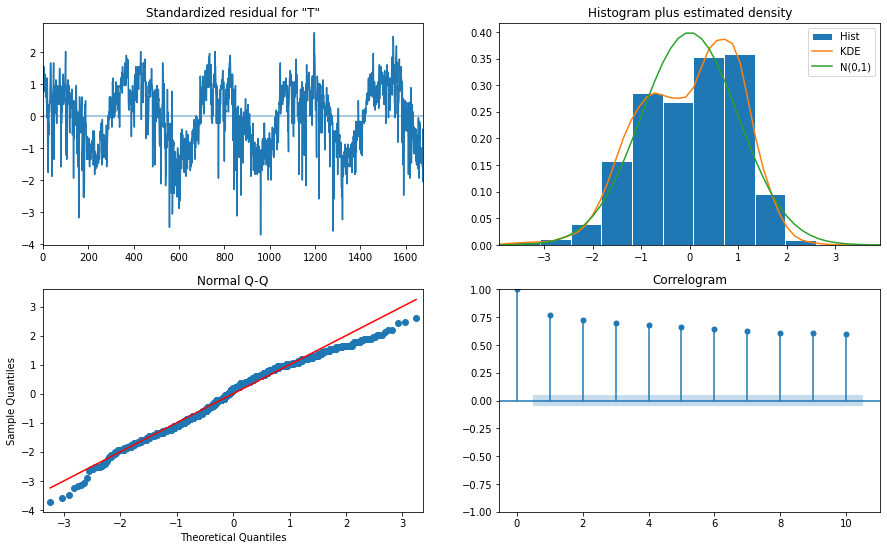

In [24]:
mod = sm.tsa.arima.ARIMA(df["TEMPERATURA MAXIMA, DIARIA(°C)"])
res = mod.fit()
print(res.summary())
fig = res.plot_diagnostics(figsize=(15,9))

## Aplicação de Aprendizado de Maquina (Prophet)

In [25]:
from prophet import Prophet

Ajustes de nomenclatura para uso do prophet

In [26]:
df_hist["ds"] = pd.to_datetime(df_hist["Data Medicao"])
df_hist["y"] = df_hist["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"]

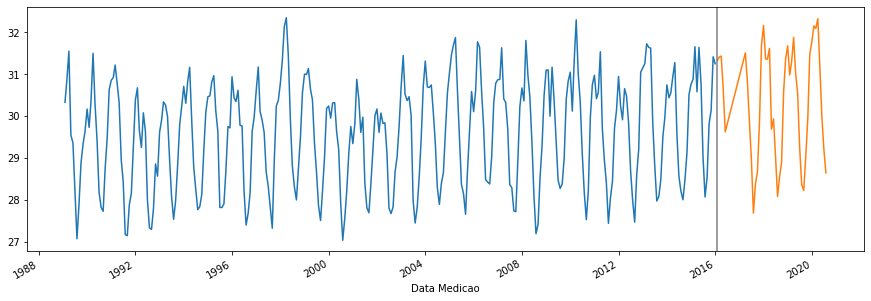

In [27]:
train = df_hist["1989":"2015"]
test = df_hist["2016":]
fig, ax = plt.subplots(figsize=(15, 5))
train["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()
test["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot()
ax.axvline('31-01-2016', color='grey')

In [28]:
model = Prophet()
model.fit(train)

09:39:58 - cmdstanpy - INFO - Chain [1] start processing
09:39:58 - cmdstanpy - INFO - Chain [1] done processing


<AxesSubplot:xlabel='Data Medicao', ylabel='y'>

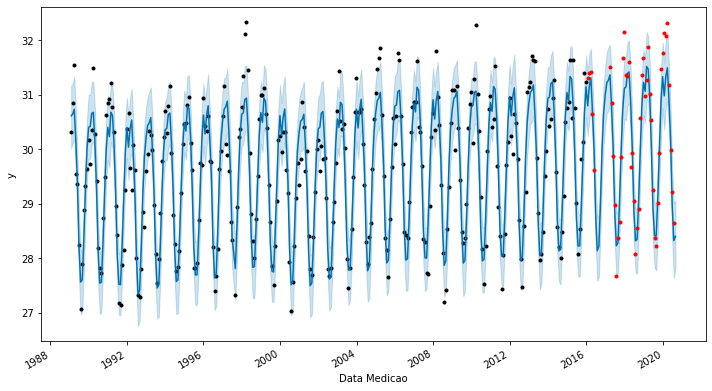

In [29]:
future = model.make_future_dataframe(periods=56, freq="M")
forecast = model.predict(future)
plot=model.plot(forecast)
test["TEMPERATURA MAXIMA MEDIA, MENSAL(°C)"].plot(color="red", style=".")

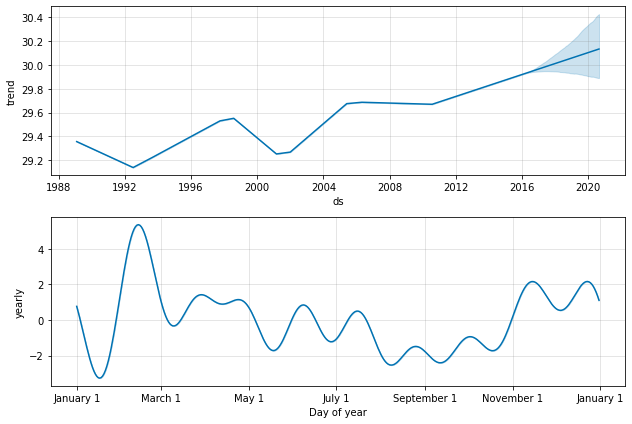

In [30]:
plot=model.plot_components(forecast)

In [31]:
df = pd.read_csv("sp-clima.csv", sep = ";")
df = df.drop("Unnamed: 6", axis=1)
df = df.dropna()
df["ds"] = pd.to_datetime(df["Data Medicao"])
df.index=pd.to_datetime(df["Data Medicao"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5577 entries, 2006-07-26 to 2021-12-31
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Data Medicao                                   5577 non-null   object        
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           5577 non-null   float64       
 2   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           5577 non-null   float64       
 3   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           5577 non-null   float64       
 4   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  5577 non-null   float64       
 5   VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)      5577 non-null   float64       
 6   ds                                             5577 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 348.6+ KB


In [32]:
df["ds"] = pd.to_datetime(df["Data Medicao"])
df["y"] = df["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"]

<AxesSubplot:xlabel='Data Medicao'>

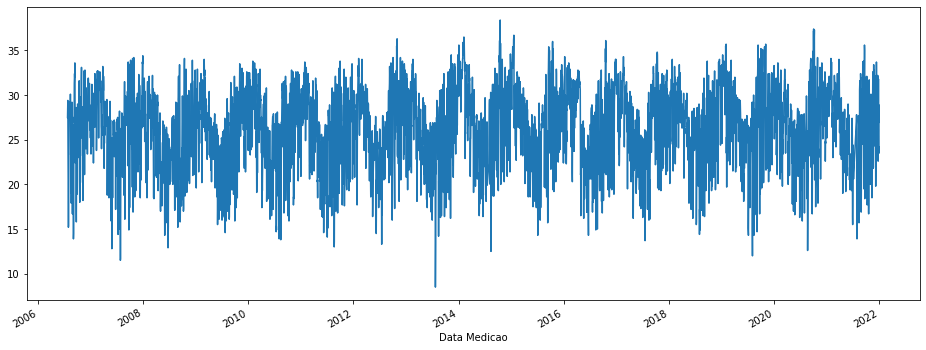

In [33]:
df["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()

<AxesSubplot:xlabel='Data Medicao'>

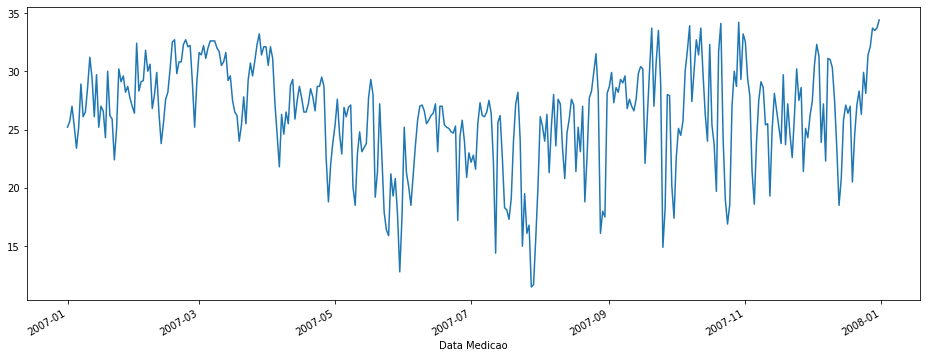

In [34]:
df["2007":"2007"]["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()

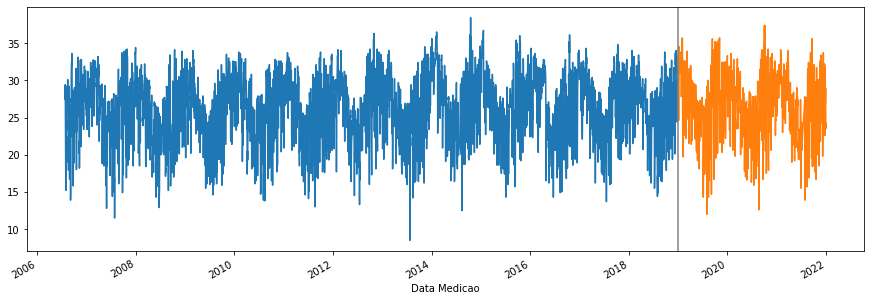

In [35]:
train = df[:"2018"]
test = df["2019":]
fig, ax = plt.subplots(figsize=(15, 5))
train["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()
test["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()
ax.axvline('01-01-2019', color="grey")

In [36]:
model = Prophet()
model.fit(train)

09:40:00 - cmdstanpy - INFO - Chain [1] start processing
09:40:00 - cmdstanpy - INFO - Chain [1] done processing


<AxesSubplot:xlabel='Data Medicao', ylabel='y'>

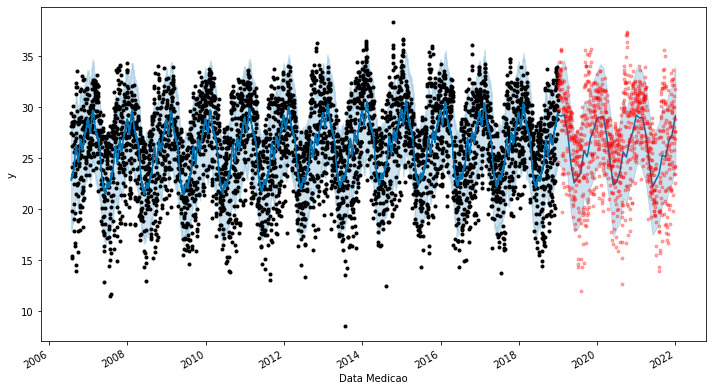

In [37]:
future = model.make_future_dataframe(periods=36, freq="M")
forecast = model.predict(future)
plot=model.plot(forecast)
test["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot(color="red", style=".", alpha=.3)

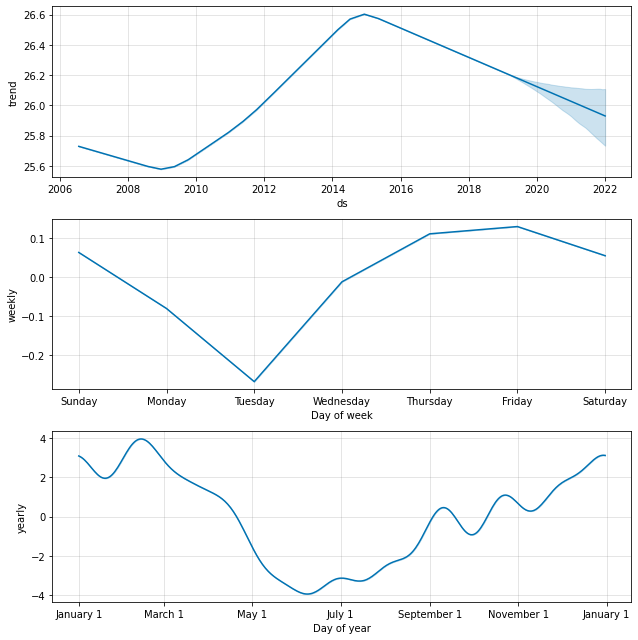

In [38]:
plot=model.plot_components(forecast)

## Aplicação de Aprendizado de Maquina (XGBoost)

In [39]:
df["mes"]=df.index.month
df["dia-ano"]=df.index.dayofyear
df["dia-mes"]=df.index.day
df["ano"]=df.index.year

In [40]:
import xgboost as xgb

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5577 entries, 2006-07-26 to 2021-12-31
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Data Medicao                                   5577 non-null   object        
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           5577 non-null   float64       
 2   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)           5577 non-null   float64       
 3   TEMPERATURA MINIMA, DIARIA (AUT)(°C)           5577 non-null   float64       
 4   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  5577 non-null   float64       
 5   VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)      5577 non-null   float64       
 6   ds                                             5577 non-null   datetime64[ns]
 7   y                                              5577 non-null   float64       
 8   mes                                     

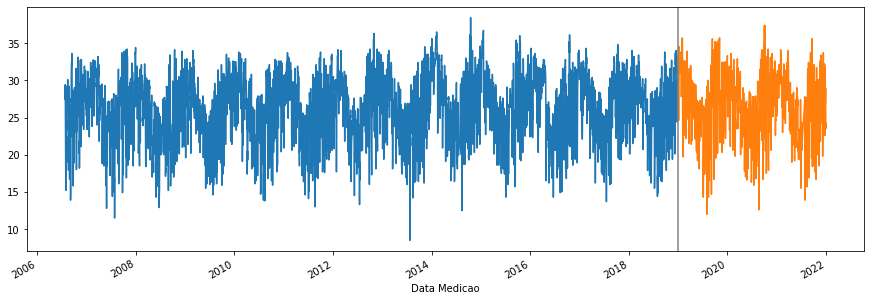

In [42]:
train = df[:"2018"]
test = df["2019":]
fig, ax = plt.subplots(figsize=(15, 5))
train["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()
test["TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"].plot()
ax.axvline('2019', color='grey')

In [43]:
x_cols = [
    "mes", "dia-ano", "dia-mes", "ano"
    ]
y_cols = "TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"

X_train = train[x_cols]
y_train = train[y_cols]

X_test = test[x_cols]
y_test = test[y_cols]

In [44]:
reg_ = xgb.XGBRegressor(
    base_score = 0.5, 
    booster="gbtree", 
    n_estimators = 1000, 
    early_stopping_rounds=100,
    objective='reg:linear'
)
reg_.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[09:40:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18.40262	validation_1-rmse:18.96794
[1]	validation_0-rmse:13.17088	validation_1-rmse:13.72303
[2]	validation_0-rmse:9.59945	validation_1-rmse:10.04480
[3]	validation_0-rmse:7.21600	validation_1-rmse:7.69684
[4]	validation_0-rmse:5.67028	validation_1-rmse:6.12416
[5]	validation_0-rmse:4.71226	validation_1-rmse:5.21170
[6]	validation_0-rmse:4.12996	validation_1-rmse:4.69123
[7]	validation_0-rmse:3.78879	validation_1-rmse:4.41376
[8]	validation_0-rmse:3.59002	validation_1-rmse:4.23991
[9]	validation_0-rmse:3.46921	validation_1-rmse:4.15121
[10]	validation_0-rmse:3.37910	validation_1-rmse:4.11051
[11]	validation_0-rmse:3.30660	validation_1-rmse:4.08274
[12]	validation_0-rmse:3.26759	validation_1-rmse:4.07635
[13]	validation_0-rmse:3.24969	validation_1-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=100, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<AxesSubplot:>

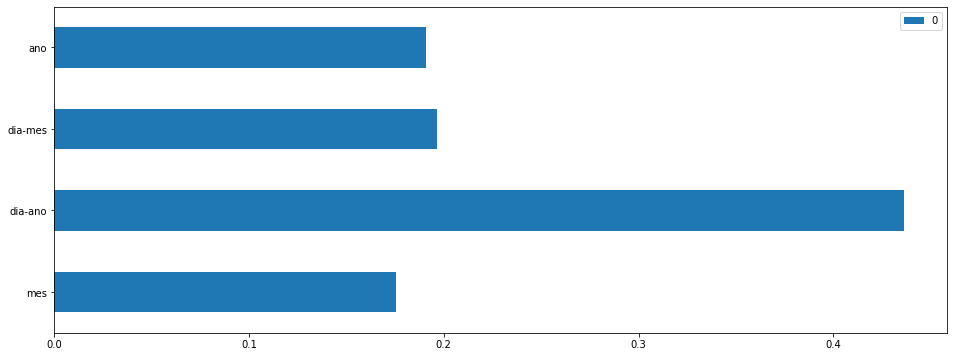

In [45]:
features = pd.DataFrame(data=reg_.feature_importances_, index=reg_.feature_names_in_)
features.plot(kind="barh")

Avaliação de Algoritmo

In [46]:
pred = copy.deepcopy(X_test)
y_pred = reg_.predict(X_test)
pred["y_pred"]=reg_.predict(X_test)

<AxesSubplot:xlabel='Data Medicao'>

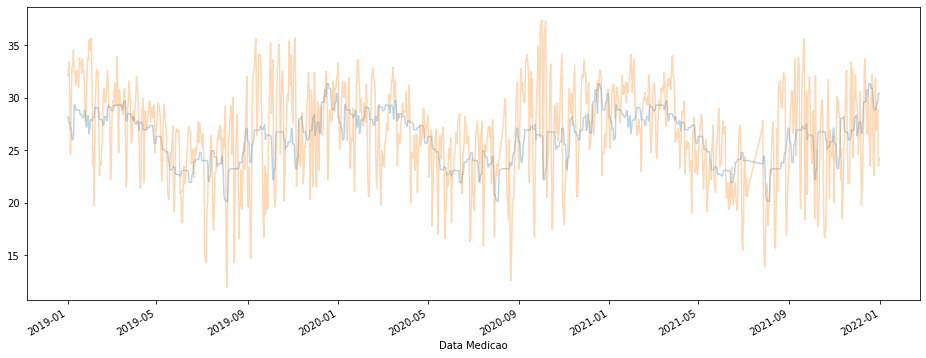

In [47]:
pred["y_pred"].plot(alpha=.3)
y_test.plot(alpha=.3)

In [48]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.252925319707018

In [49]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=True)

16.51285405259352

In [50]:
#RMSE
mean_squared_error(y_test, y_pred, squared=False)

4.063601118785347

In [51]:
#MAPE
from sklearn.metrics import mean_absolute_percentage_error
100*mean_absolute_percentage_error(y_test, y_pred)

12.94662109028917

uso de parametros adicionais

In [52]:
x_cols = [
    "mes", "dia-ano", "dia-mes", "ano",
    "PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",
    "UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",
    "VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
    ]
y_cols = "TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"

X_train = train[x_cols]
y_train = train[y_cols]

X_test = test[x_cols]
y_test = test[y_cols]

In [53]:
reg = xgb.XGBRegressor(
    base_score = 0.5, 
    booster="gbtree", 
    n_estimators = 1000, 
    early_stopping_rounds=100,
    objective='reg:linear'
)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[09:40:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18.32254	validation_1-rmse:18.66778
[1]	validation_0-rmse:12.98321	validation_1-rmse:13.12182
[2]	validation_0-rmse:9.27364	validation_1-rmse:9.28936
[3]	validation_0-rmse:6.71641	validation_1-rmse:6.68849
[4]	validation_0-rmse:4.98495	validation_1-rmse:4.97934
[5]	validation_0-rmse:3.83166	validation_1-rmse:3.93734
[6]	validation_0-rmse:3.08906	validation_1-rmse:3.28026
[7]	validation_0-rmse:2.63380	validation_1-rmse:2.91113
[8]	validation_0-rmse:2.35053	validation_1-rmse:2.70156
[9]	validation_0-rmse:2.18691	validation_1-rmse:2.56738
[10]	validation_0-rmse:2.09366	validation_1-rmse:2.50774
[11]	validation_0-rmse:2.03294	validation_1-rmse:2.48181
[12]	validation_0-rmse:1.98042	validation_1-rmse:2.44366
[13]	validation_0-rmse:1.93653	validation_1-rmse:2

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=100, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<AxesSubplot:>

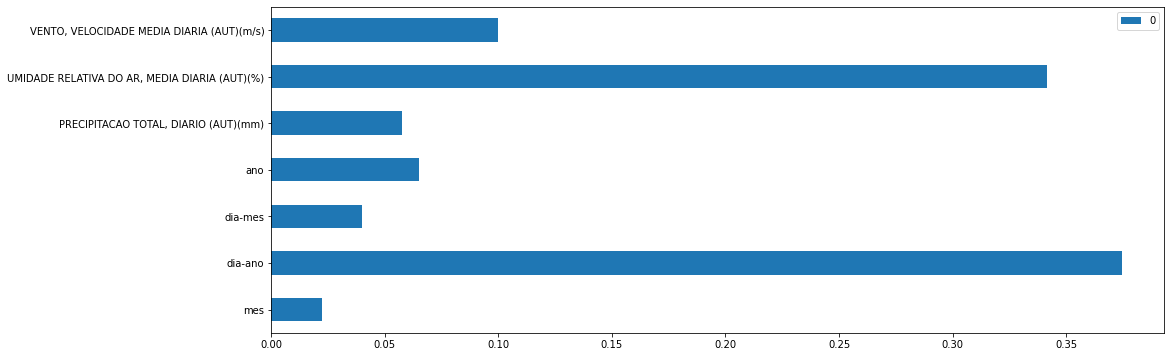

In [54]:
features = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_)
features.plot(kind="barh")

Avaliação de Algoritmo

In [55]:
pred = copy.deepcopy(X_test)
y_pred = reg.predict(X_test)
pred["y_pred"]=reg.predict(X_test)

<AxesSubplot:xlabel='Data Medicao'>

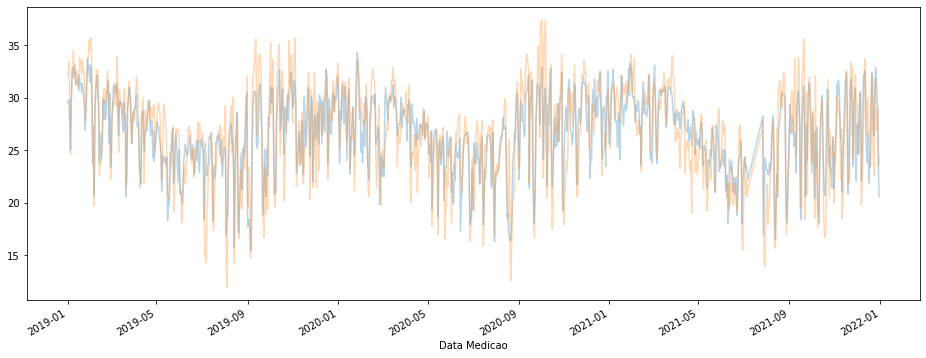

In [56]:
pred["y_pred"].plot(alpha=.3)
y_test.plot(alpha=.3)

In [57]:
#MAE
mean_absolute_error(y_test, y_pred)

1.869106167809198

In [58]:
#MSE
mean_squared_error(y_test, y_pred, squared=True)

5.862643787356254

In [59]:
#RMSE
mean_squared_error(y_test, y_pred, squared=False)

2.4212896950501923

In [60]:
#MAPE
100*mean_absolute_percentage_error(y_test, y_pred)

7.427353949853408